In [78]:
import numpy as np
from cmdstanpy import CmdStanModel
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

## The Prior tests were prepared for the best, average, and weakest driver.

In [79]:
model_1_ppc = CmdStanModel(stan_file='model_1_ppc.stan')

In [80]:
def draw_plots_ppc_model_1(sigmas, driver_rating):
    fig, axes = plt.subplots(3, 5, figsize=(8*4, 15))

    for s_i in range(3):
        sigma = {'sigma': sigmas[s_i], 'driver_rating': driver_rating} # Standard scaler for driver rating ang avg_pos
        model_1_ppc_sim = model_1_ppc.sample(data=sigma, iter_warmup=1, fixed_param=True, seed=25062025, show_progress=False)
        
        axes[s_i, 0].hist(model_1_ppc_sim.stan_variable('alpha_driver').flatten(), bins=100, density=True)
        axes[s_i, 0].set_yticks([])
        axes[s_i, 0].set_title(f'alpha_driver Normal(0,{sigmas[s_i]})$')

        axes[s_i, 1].hist(model_1_ppc_sim.stan_variable('year').flatten(), bins=100, density=True)
        axes[s_i, 1].set_yticks([])
        axes[s_i, 1].set_title(f'year Normal(0,{sigmas[s_i]})')

        axes[s_i, 2].hist(model_1_ppc_sim.stan_variable('constructor').flatten(), bins=100, density=True)
        axes[s_i, 2].set_yticks([])
        axes[s_i, 2].set_title(f'constructor Normal(0,{sigmas[s_i]})$')

        axes[s_i, 3].hist(model_1_ppc_sim.stan_variable('theta').flatten(), bins=100, density=True)
        axes[s_i, 3].set_yticks([])
        axes[s_i, 3].set_title(f'theta = constructor + year - alpha_driver * driver_rating')

        # pos_min = 1, pos_max = 20
        positions = model_1_ppc_sim.stan_variable('y_ppc').flatten() + 1  # shift to 1-based if needed
        n_bins = np.arange(0.5, 21.6, 1)  # bin edges centered on integers 1–21
        axes[s_i, 4].hist(positions, bins=n_bins, rwidth=1, density=True)
        axes[s_i, 4].set_xticks(np.arange(1, 21))  # labels from 1 to 20
        axes[s_i, 4].set_xlim([0.5, 21.5])
        axes[s_i, 4].set_yticks([])
        axes[s_i, 4].set_title('Position')

    axes[2, 0].set_xlabel('alpha_driver')
    axes[2, 1].set_xlabel('year')
    axes[2, 2].set_xlabel('constructor')
    axes[2, 3].set_xlabel('theta')
    axes[2, 4].set_xlabel('Position')

    fig.tight_layout()
    plt.show()

### The driver with the best results.

16:42:12 - cmdstanpy - INFO - CmdStan start processing


16:42:12 - cmdstanpy - INFO - Chain [1] start processing
16:42:12 - cmdstanpy - INFO - Chain [2] start processing
16:42:12 - cmdstanpy - INFO - Chain [3] start processing
16:42:12 - cmdstanpy - INFO - Chain [4] start processing
16:42:12 - cmdstanpy - INFO - Chain [4] done processing
16:42:12 - cmdstanpy - INFO - Chain [1] done processing
16:42:12 - cmdstanpy - INFO - Chain [3] done processing
16:42:12 - cmdstanpy - INFO - Chain [2] done processing
16:42:12 - cmdstanpy - INFO - CmdStan start processing
16:42:12 - cmdstanpy - INFO - Chain [1] start processing
16:42:12 - cmdstanpy - INFO - Chain [2] start processing
16:42:12 - cmdstanpy - INFO - Chain [3] start processing
16:42:12 - cmdstanpy - INFO - Chain [4] start processing
16:42:12 - cmdstanpy - INFO - Chain [4] done processing
16:42:12 - cmdstanpy - INFO - Chain [3] done processing
16:42:12 - cmdstanpy - INFO - Chain [2] done processing
16:42:12 - cmdstanpy - INFO - Chain [1] done processing
16:42:12 - cmdstanpy - INFO - CmdStan sta

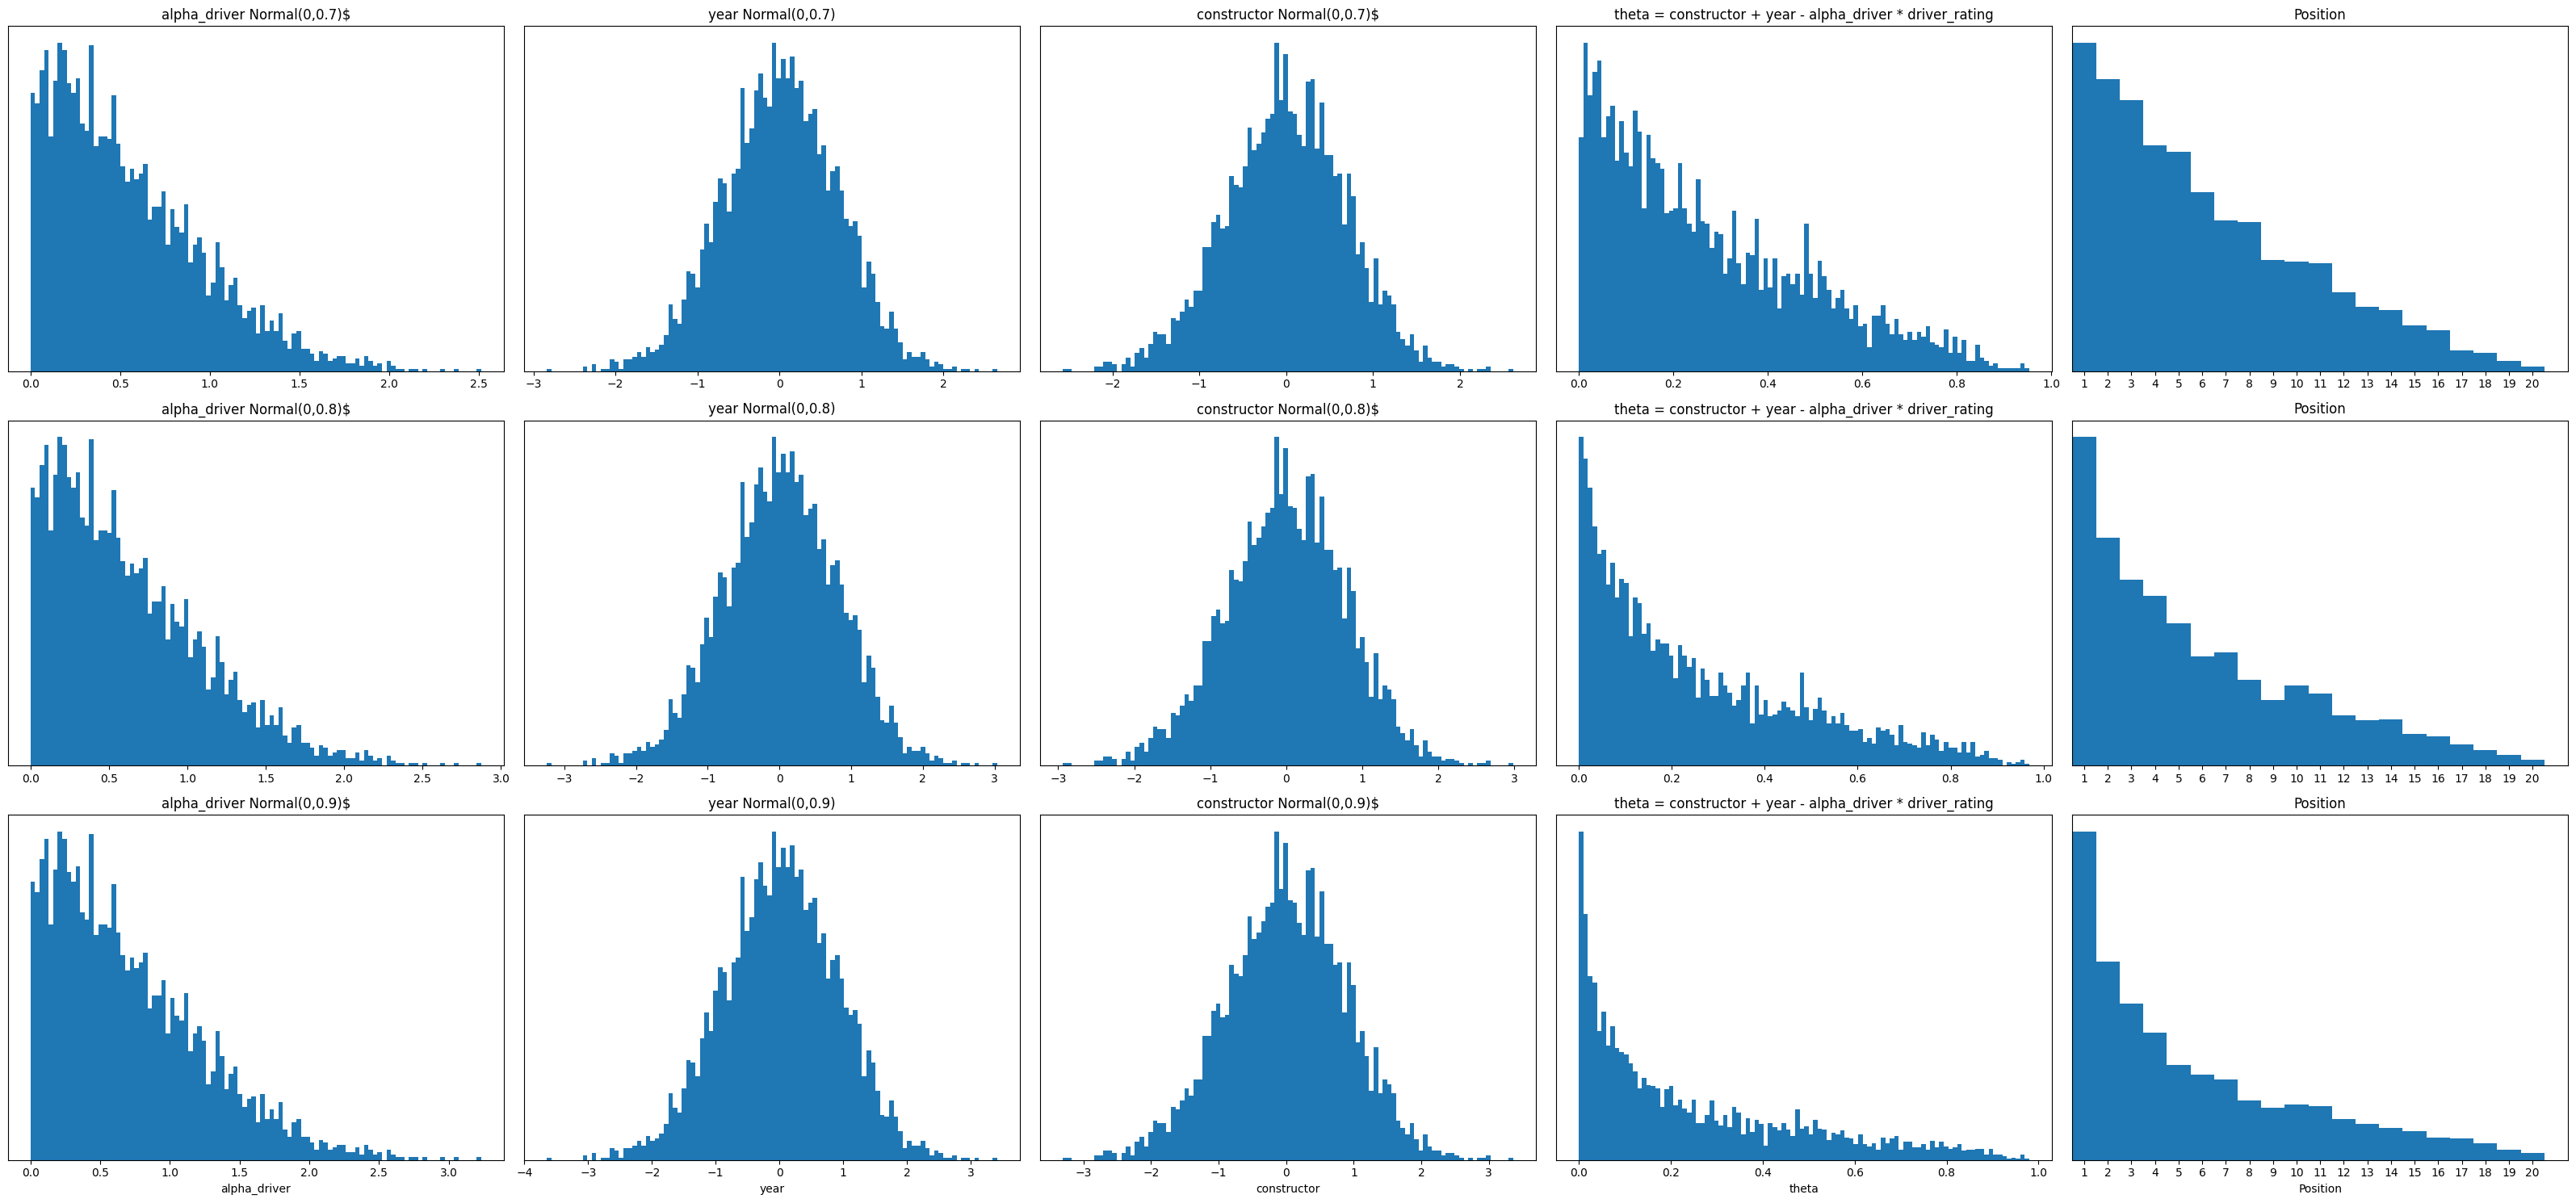

In [81]:
sigmas = [0.7, 0.8, 0.9]
driver_rating = 2.5

draw_plots_ppc_model_1(sigmas, driver_rating)

### The driver with the average results.

16:42:13 - cmdstanpy - INFO - CmdStan start processing
16:42:13 - cmdstanpy - INFO - Chain [1] start processing
16:42:13 - cmdstanpy - INFO - Chain [2] start processing
16:42:13 - cmdstanpy - INFO - Chain [3] start processing
16:42:13 - cmdstanpy - INFO - Chain [4] start processing
16:42:13 - cmdstanpy - INFO - Chain [3] done processing
16:42:13 - cmdstanpy - INFO - Chain [4] done processing
16:42:13 - cmdstanpy - INFO - Chain [1] done processing
16:42:13 - cmdstanpy - INFO - Chain [2] done processing
16:42:13 - cmdstanpy - INFO - CmdStan start processing
16:42:13 - cmdstanpy - INFO - Chain [1] start processing
16:42:13 - cmdstanpy - INFO - Chain [2] start processing
16:42:13 - cmdstanpy - INFO - Chain [3] start processing
16:42:13 - cmdstanpy - INFO - Chain [4] start processing
16:42:13 - cmdstanpy - INFO - Chain [3] done processing
16:42:13 - cmdstanpy - INFO - Chain [4] done processing
16:42:13 - cmdstanpy - INFO - Chain [1] done processing
16:42:13 - cmdstanpy - INFO - Chain [2] do

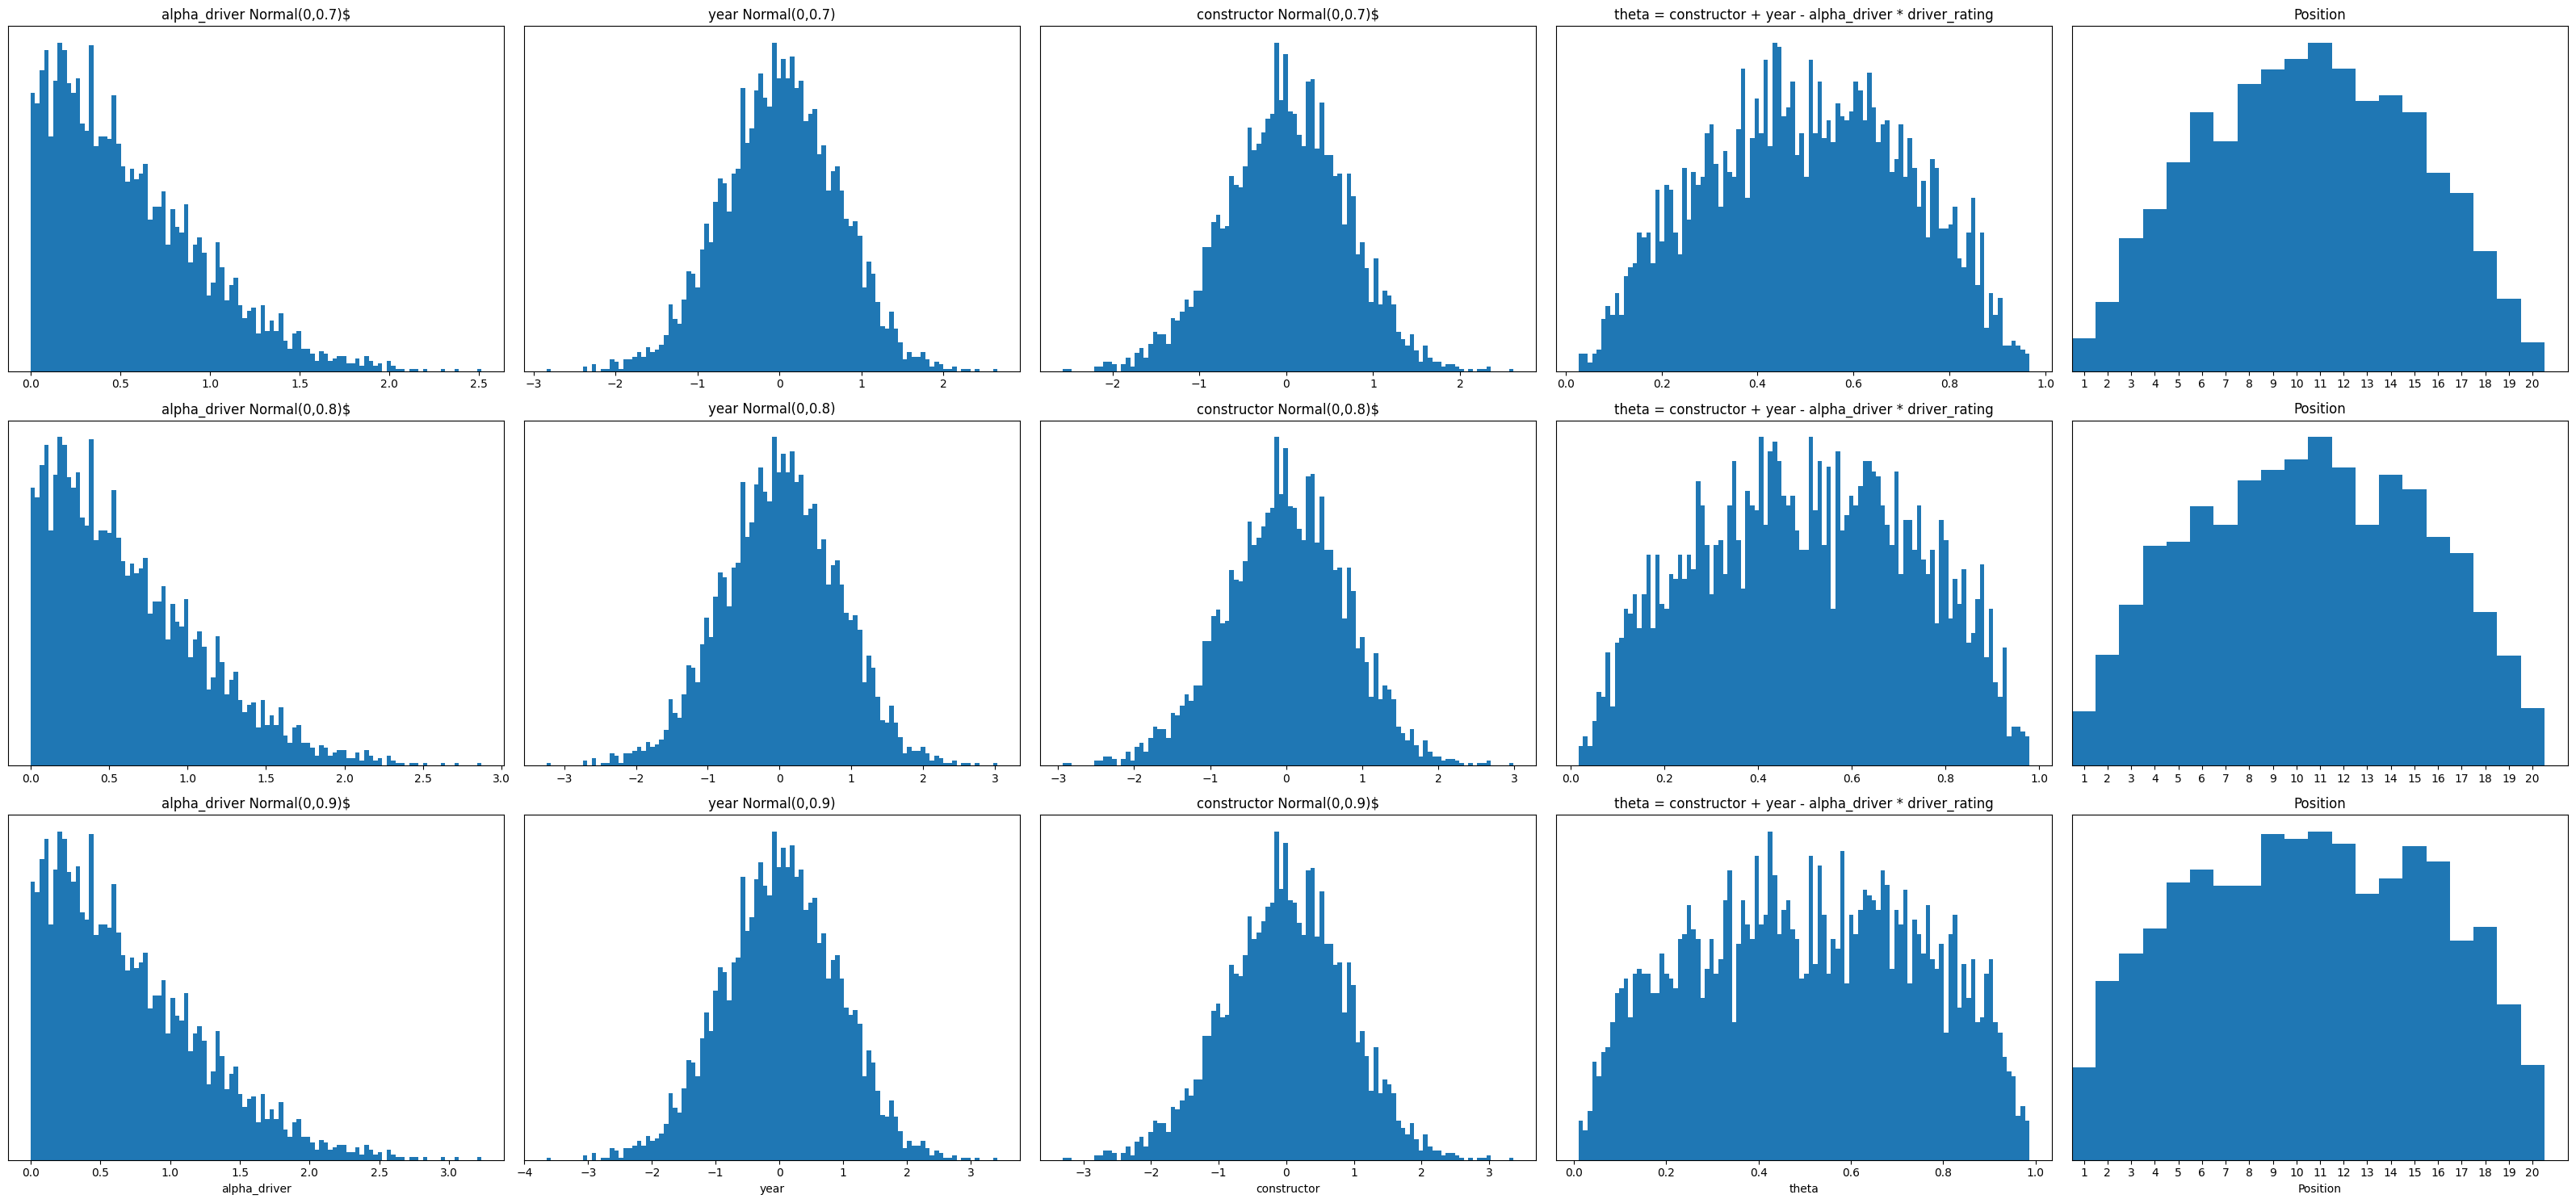

In [82]:
sigmas = [0.7, 0.8, 0.9]
driver_rating = 0

draw_plots_ppc_model_1(sigmas, driver_rating)

### The driver with the weakest results.

16:42:14 - cmdstanpy - INFO - CmdStan start processing
16:42:14 - cmdstanpy - INFO - Chain [1] start processing
16:42:14 - cmdstanpy - INFO - Chain [2] start processing
16:42:14 - cmdstanpy - INFO - Chain [3] start processing
16:42:14 - cmdstanpy - INFO - Chain [4] start processing
16:42:14 - cmdstanpy - INFO - Chain [4] done processing
16:42:14 - cmdstanpy - INFO - Chain [3] done processing
16:42:14 - cmdstanpy - INFO - Chain [2] done processing
16:42:14 - cmdstanpy - INFO - Chain [1] done processing
16:42:14 - cmdstanpy - INFO - CmdStan start processing
16:42:14 - cmdstanpy - INFO - Chain [1] start processing
16:42:14 - cmdstanpy - INFO - Chain [2] start processing
16:42:14 - cmdstanpy - INFO - Chain [3] start processing
16:42:14 - cmdstanpy - INFO - Chain [4] start processing
16:42:14 - cmdstanpy - INFO - Chain [3] done processing
16:42:14 - cmdstanpy - INFO - Chain [4] done processing
16:42:14 - cmdstanpy - INFO - Chain [1] done processing
16:42:14 - cmdstanpy - INFO - Chain [2] do

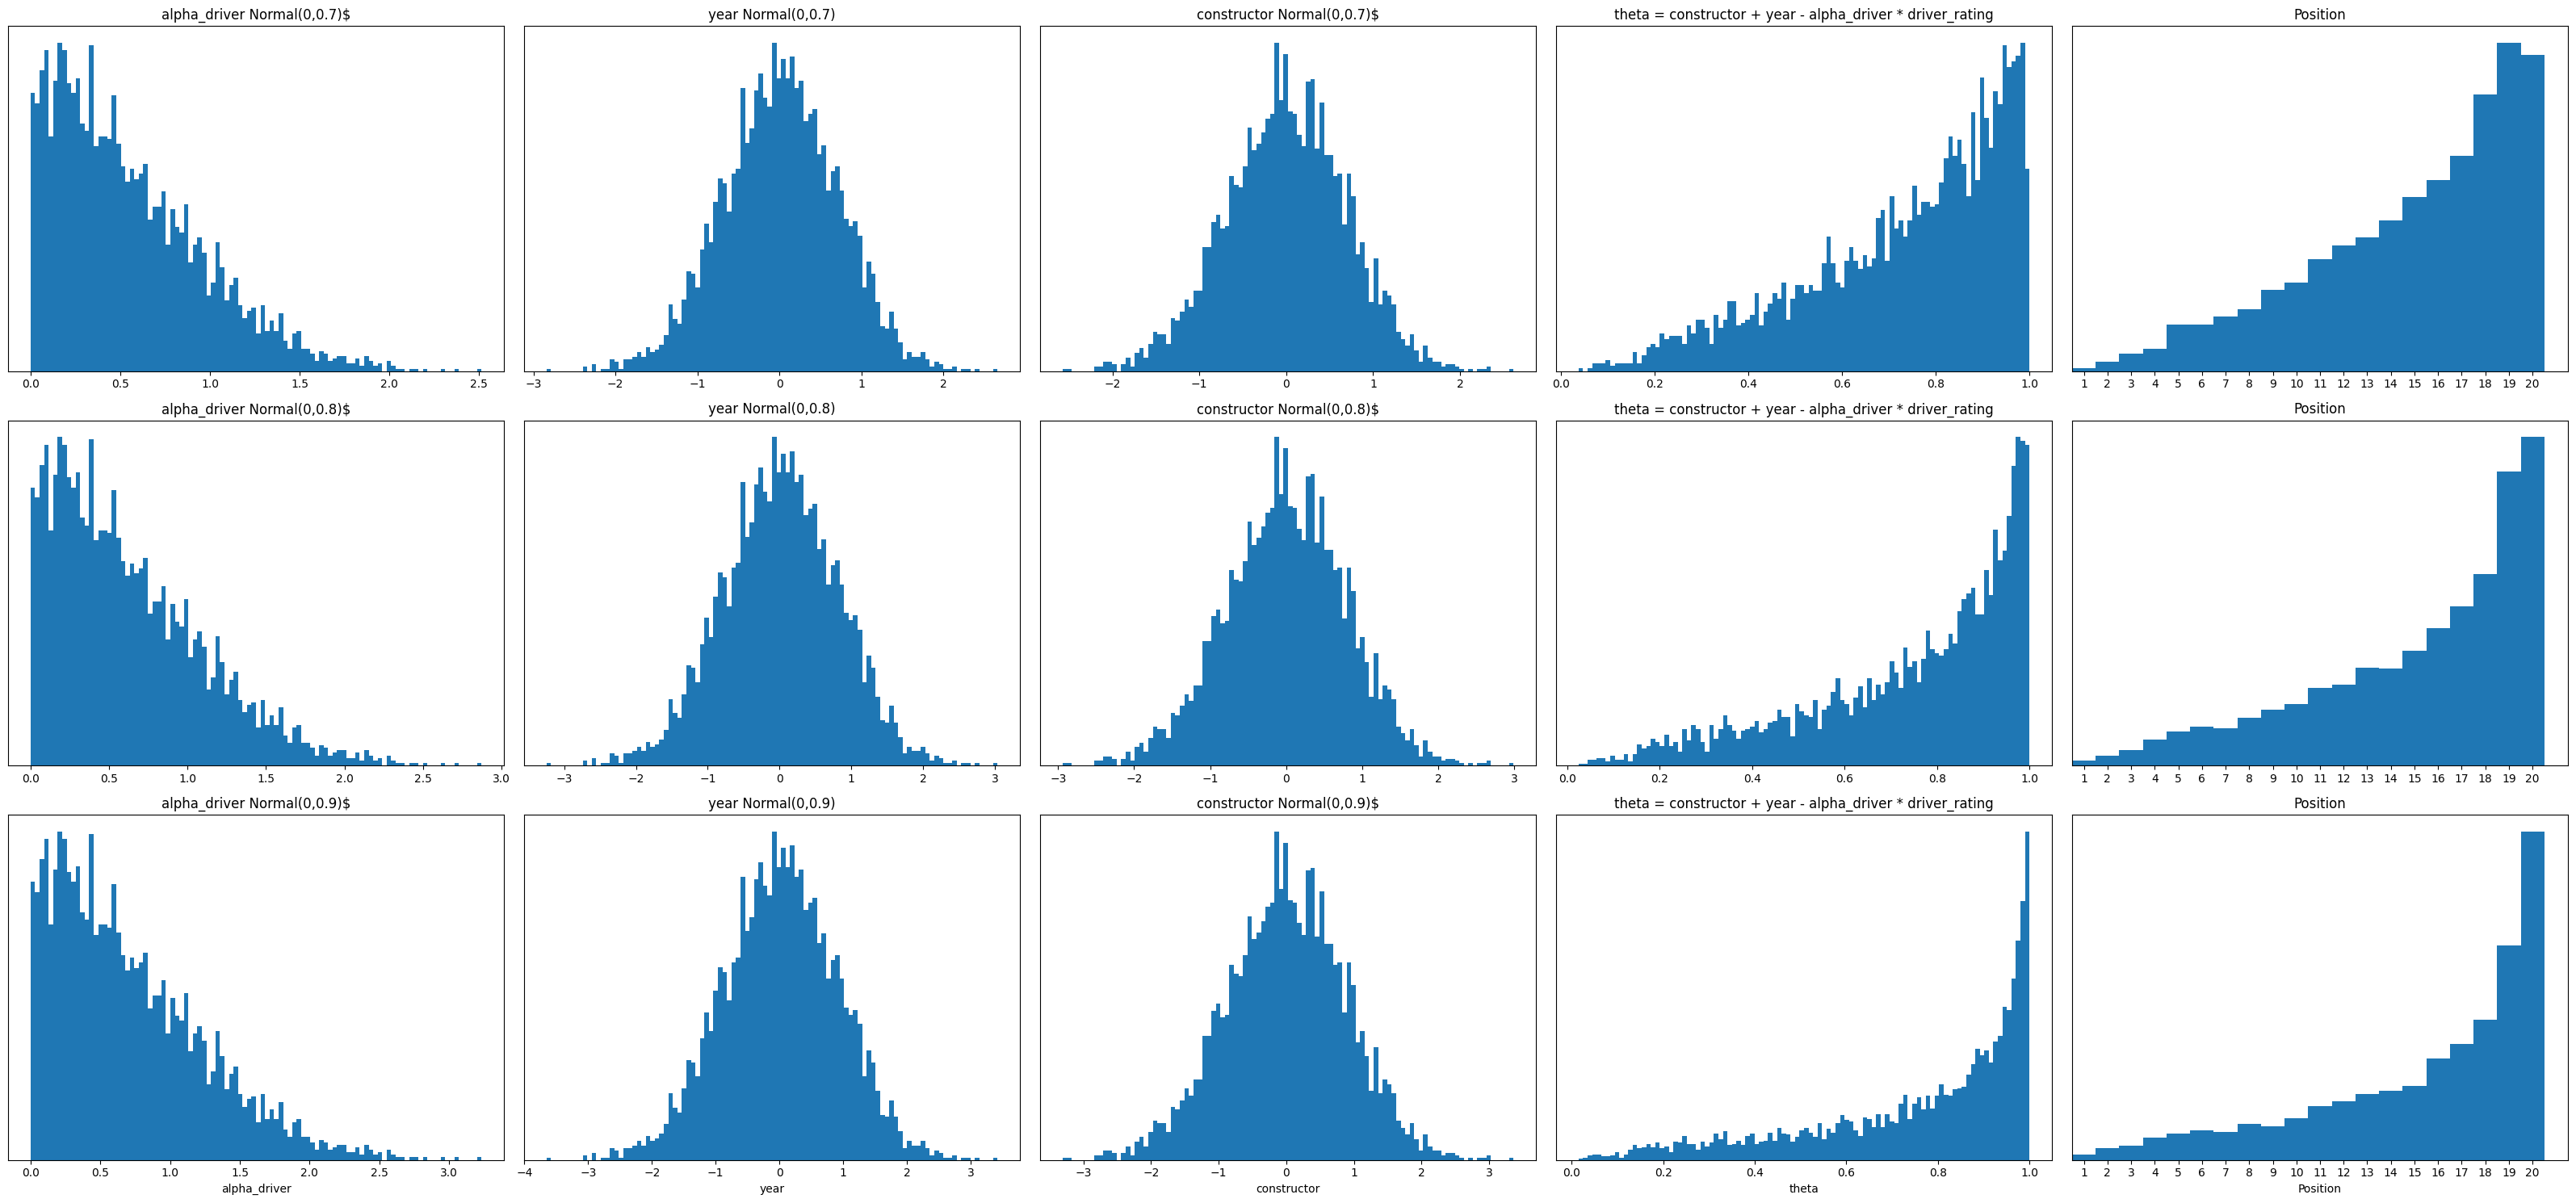

In [83]:
sigmas = [0.7, 0.8, 0.9]
driver_rating = -2.5

draw_plots_ppc_model_1(sigmas, driver_rating)